## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from pathlib import Path

## Load dataset

In [4]:
path = Path().cwd()
data_file = path.parent / "Data" / "Ex3Data.csv"

T = pd.read_csv(data_file, header=None)

n, p = T.shape
X = np.array(T.loc[:, T.columns != 2])
y = np.array(T.loc[:, T.columns == 2]).T.reshape(n,1)

seed = 42

## Helper functions

In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### 3 Apply and interpret Support Vector Machines (SVM):

> a) Given the data in Ex3Data.csv, pick the kernel type as well as values of $\lambda$ and $\sigma$,
which gave the best visual results. Explain your decision.

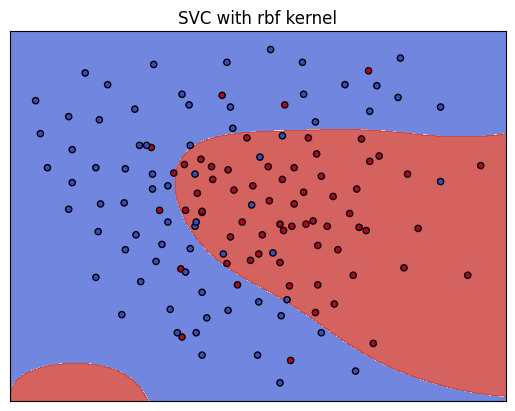

In [15]:
#Try to experiment with different parameters values. What can we adjust and what effect does the parameters serve
kernelType = 'rbf'      # Kernel
C = 10                  # Lambda
degreeVal = 11
gamma = 'scale'         # sigma

clf = SVC(C=C, kernel=kernelType, gamma=gamma, degree=degreeVal)

# title for the plots
title = 'SVC with %s kernel' % kernelType
        
# Set-up 2x2 grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.subplot(111)
plot_contours(ax, clf.fit(X,y.ravel()), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y.T.tolist()[0], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [9]:
# Alternatively we can try a CV loop
clf = SVC()

kernelType = ['sigmoid', 'linear', 'rbf', 'poly']  # <----- YOUR CHOICE. Specifies the kernel type to be used in the algorithm. 
                    # It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
                    # If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute
                    # the kernel matrix from data matrices; that matrix should be an array of shape 
                    # (n_samples, n_samples).
                
degreeVal = range(1,10,1)   # <----- YOUR CHOICE. Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.

cVal = np.logspace(-1,4, 6)   #  # <----- YOUR CHOICE. Penalty parameter C of the error term.
                                # The C parameter trades off misclassification of training examples
                                # against simplicity of the decision surface. A low C makes the decision 
                                # surface smooth, while a high C aims at classifying all training examples
                                # correctly by giving the model freedom to select more samples as support vectors.
                
gammaVal = np.arange(0.1, 1.1, 0.1) #  <----- YOUR CHOICE. Kernel coefficient for (‘rbf’), (‘poly’) and (‘sigmoid’). Ignored by all other kernels.
                
                
# Try to add more of the parameters from the model and then add them to this dict to see how it affects the model.
param_grid = {
    'kernel': kernelType,
    'C': cVal,
    'degree': degreeVal,
    'gamma': gammaVal
}

rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1)

# Fit the grid search model
rf_grid.fit(X, y.ravel())

print(rf_grid.best_estimator_)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


KeyboardInterrupt: 